In [1]:
## Import statement: pandas is a "package"
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.formula.api as smf


/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [3]:
df_housing = pd.read_csv("data/housing.csv")
df_housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [4]:
mod_housing = smf.ols(data = df_housing,
                     formula = "median_house_value ~ housing_median_age + median_income").fit()
print(mod_housing.rsquared)
print(mod_housing.rsquared_adj)

0.5091195899765227
0.5090720171306611


In [7]:
mod_null = smf.ols(data = df_housing, formula = "median_house_value ~ 1").fit()
mod_null.rsquared_adj

-2.220446049250313e-16

In [8]:
mod_age = smf.ols(data = df_housing, formula = "median_house_value ~ housing_median_age").fit()
mod_income = smf.ols(data = df_housing, formula = "median_house_value ~ median_income").fit()
print(mod_age.rsquared_adj)
print(mod_income.rsquared_adj)

0.011108391530169626
0.47342197807000574


In [9]:
mod_both = smf.ols(data = df_housing,
                   formula = "median_house_value ~ housing_median_age + median_income").fit()
mod_both.rsquared_adj

0.5090720171306611

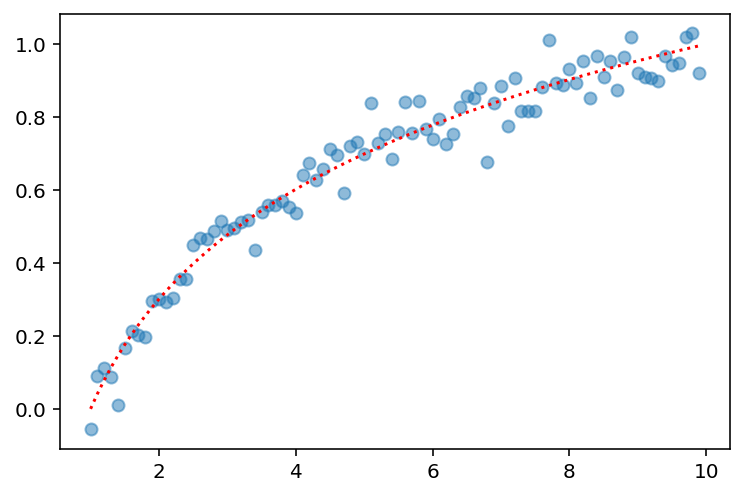

In [16]:
X = np.arange(1, 10, .1)
b0, b1 = 0, 1
y = b0 + b1 * np.log10(X)
y_err = np.random.normal(scale = .05, size = len(X))
plt.scatter(X, y + y_err, alpha = .5)
plt.plot(X, y, linestyle = "dotted", color = "red")